# Chapter: Data Preprocessing

# Topic: Implementing MLR on simulated process data

In [1]:
# read data
import numpy as np
VSdata = np.loadtxt('VSdata.csv', delimiter=',')
VSdata_val = np.loadtxt('VSdata_val.csv', delimiter=',')

In [2]:
# separate X and y
y_train = VSdata[:,0]
X_train = VSdata[:,1:]

y_val = VSdata_val[:,0]
X_val = VSdata_val[:,1:]

In [3]:
##  %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##           MLR using all variables
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

0.6143478736440409


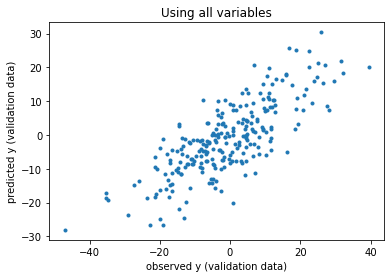

In [8]:
# fit model on training data 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

# scale X
scaler_all = StandardScaler()
X_train_scaled = scaler_all.fit_transform(X_train)
X_val_scaled = scaler_all.transform(X_val)

# fit
MLR_all = LinearRegression().fit(X_train_scaled, y_train)

# predict
y_val_pred = MLR_all.predict(X_val_scaled)

# score
R2_all_train = MLR_all.score(X_train_scaled, y_train)
R2_all = MLR_all.score(X_val_scaled, y_val)
print(R2_all)

# plot raw vs predicted target
plt.figure()
plt.plot(y_val, y_val_pred, '.')
plt.title('Using all variables')
plt.xlabel('observed y (validation data)')
plt.ylabel('predicted y (validation data)')
plt.show()

In [9]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##           MLR using only 10 relevant variables
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

0.6339710202313695


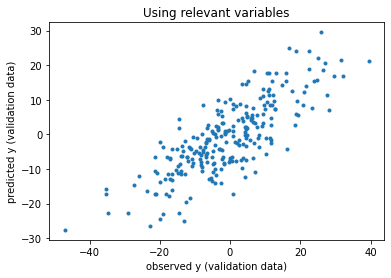

In [11]:
# select only relevant inputs
k = 10
X_train_rel = X_train[:,16:16+k]
X_val_rel = X_val[:,16:16+k]

# scale X
scaler_rel = StandardScaler()
X_train_rel_scaled = scaler_rel.fit_transform(X_train_rel)
X_val_rel_scaled = scaler_rel.transform(X_val_rel)

# fit
MLR_rel = LinearRegression().fit(X_train_rel_scaled, y_train)

# predict
y_val_rel_pred = MLR_rel.predict(X_val_rel_scaled)

# score
R2_rel_train = MLR_rel.score(X_train_rel_scaled, y_train)
R2_rel = MLR_rel.score(X_val_rel_scaled, y_val)
print(R2_rel)

# plot raw vs predicted target
plt.figure()
plt.plot(y_val, y_val_rel_pred, '.')
plt.title('Using relevant variables')
plt.xlabel('observed y (validation data)')
plt.ylabel('predicted y (validation data)')
plt.show()